# Mathematics and Multivariate Statistics.
---
<b>MADS-MMS Portfolio-Exam Part 1<br>
Janosch Höfer, 938969</b>

## Table of contents

- [Imports](#intro) <br>
- [1. Exercise](#ex1) <br>
- [2. Exercise](#ex2) <br>
- [3. Exercise](#ex3) <br>
- [4. Exercise](#ex4) <br>
- [References](#ref)

## Imports

In [1]:
# Installed libraries
import numpy as np
from sklearn.datasets import make_blobs, make_classification
from sklearn.cluster import KMeans
from sympy import symbols
from sympy.matrices import Matrix
from sympy.solvers.solveset import linsolve

# Own classes and functions
from helper_functions.plot_clusters import draw_plot

---
<a id='ex1'></a>

## 1. Exercise
### 1.1. Explain the return value of the sklearn function make_blobs. Address both structure and meaning.

The <i>make_blobs</i> function [[1]](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) creates artificial clusters. The return value is a tuple.

In [2]:
random_state = 1

In [3]:
artificial_blobs = make_blobs(n_samples=100, centers=3, n_features=2, random_state=random_state)
print(f"Return type:\t'{type(artificial_blobs)}'\nReturn #items:\t{len(artificial_blobs)}")
for idx, item in enumerate(artificial_blobs):
    print(f"Item[{idx}]:\t{type(item)}")

Return type:	'<class 'tuple'>'
Return #items:	2
Item[0]:	<class 'numpy.ndarray'>
Item[1]:	<class 'numpy.ndarray'>


Depending on whether the cluster centers are to be returned, the tuple either contains two Numpy arrays...

In [4]:
artificial_blobs = make_blobs(
    n_samples=100, centers=3, n_features=2, random_state=random_state, return_centers=True
)
print(f"Return type:\t'{type(artificial_blobs)}'\nReturn #items:\t{len(artificial_blobs)}")
for idx, item in enumerate(artificial_blobs):
    print(f"Item[{idx}]:\t{type(item)}")

Return type:	'<class 'tuple'>'
Return #items:	3
Item[0]:	<class 'numpy.ndarray'>
Item[1]:	<class 'numpy.ndarray'>
Item[2]:	<class 'numpy.ndarray'>


... or three Numpy arrays. In the later case the additional Numpy array contains the cluster centers.<br>

The first Numpy array contains the samples. In our example we have created 10 samples with two features each. In order to create the 10 samples, first the centers are generated using the <i>numpy.random.Generator.uniform</i> function [[2]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html).

In [5]:
random_generator = np.random.RandomState(random_state)
random_generator.uniform(-10.0, 10.0, (3, 2))

array([[-1.65955991,  4.40648987],
       [-9.9977125 , -3.95334855],
       [-7.06488218, -8.1532281 ]])

In [6]:
artificial_blobs[2]

array([[-1.65955991,  4.40648987],
       [-9.9977125 , -3.95334855],
       [-7.06488218, -8.1532281 ]])

Next the number of samples per center is calculated and then the samples for each center are drawn from a normal Gaussian distribution [[3]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html).

In [7]:
artificial_blobs[0][:10]

array([[ -0.79415228,   2.10495117],
       [ -9.15155186,  -4.81286449],
       [-11.44182631,  -4.45781441],
       [ -9.76761777,  -3.19133737],
       [ -4.53655648,  -8.40186288],
       [ -6.26302115,  -8.10666081],
       [ -6.38481234,  -8.4730297 ],
       [ -9.20490564,  -4.57687928],
       [ -2.76017908,   5.55121358],
       [ -1.17104176,   4.33091816]])

The second Numpy array contains the labels for the samples. The labels are just the indexes of the previously generated centers.

In [8]:
artificial_blobs[1][:10]

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0])

### 1.2. Compare the result of make_blobs to the data typically available in a real-world clustering task. What would be the main difference?

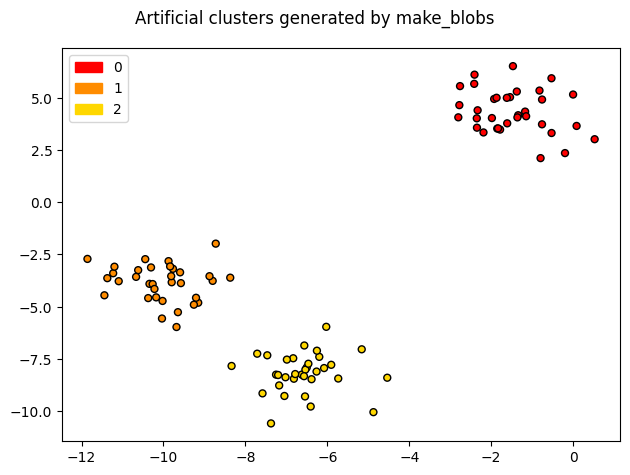

In [9]:
draw_plot(
    artificial_blobs[0],
    hue=artificial_blobs[1],
    title="Artificial clusters generated by make_blobs",
)

The clusters generated by <i>make_blobs</i> are very clearly separated. Real-world data usually is not that well separated, making it harder to identify the different clusters. A more "realistic" dataset would look like the example below, which was taken from the Scikit learn website [[4]](https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html).

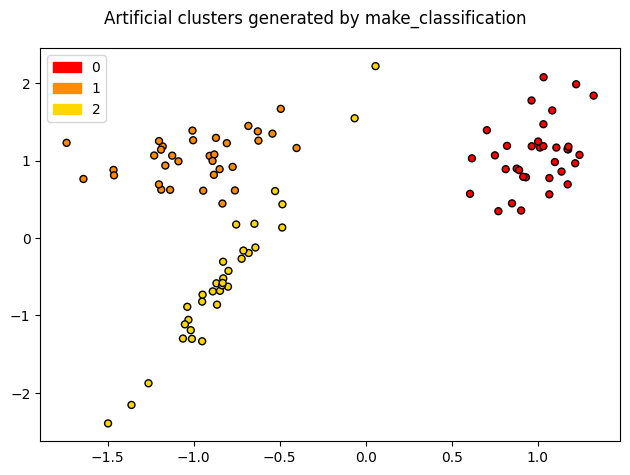

In [10]:
X1, Y1 = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=random_state,
)
draw_plot(
    X1,
    hue=Y1,
    title="Artificial clusters generated by make_classification",
)

---
<a id='ex2'></a>

## 2. Exercise
Use the function make_blobs to create two datasets 𝐴 and 𝐵 with the following specifications:<br>
Each dataset should contain 500 samples. Additionally, use shuffling, a random seed of 1, and the following parameters to specify the datasets:

| **dataset** | **# features** |                          cluster_centers                         |    cluster_std   |
|:-----------:|:--------------:|:----------------------------------------------------------------:|:----------------:|
|      A      |        2       |                          [[1,2], [5,7]]                          | [[0.1,1], [2,3]] |
|      B      |        4       | [[1,1,1,0], [6,1,1,3], [1,7,2,1],<br>[1.5,2,5,5], [10,11,12,13]] |        .6        |

### 2.1. Create the dataset as described above.

In [11]:
n_samples = 500
shuffle = True

In [12]:
dataset_a, labels_a, centers_a = make_blobs(
    n_samples=n_samples,
    centers=[(1, 2), (5, 7)],
    random_state=random_state,
    shuffle=shuffle,
    cluster_std=[[0.1, 1], [2, 3]],
    return_centers=True,
)
centers_a

array([[1, 2],
       [5, 7]])

In [13]:
dataset_b, labels_b, centers_b = make_blobs(
    n_samples=n_samples,
    centers=[(1, 1, 1, 0), (6, 1, 1, 3), (1, 7, 2, 1), (1.5, 2, 5, 5), (10, 11, 12, 13)],
    random_state=random_state,
    shuffle=shuffle,
    cluster_std=0.6,
    return_centers=True,
)
centers_b

array([[ 1. ,  1. ,  1. ,  0. ],
       [ 6. ,  1. ,  1. ,  3. ],
       [ 1. ,  7. ,  2. ,  1. ],
       [ 1.5,  2. ,  5. ,  5. ],
       [10. , 11. , 12. , 13. ]])

### 2.2. Plot the data in (one or more) suitable ways such that the structure of the blobs can be read from the visualizations. Use diagrams with the same scaling for all axes. You may use the full result of make_blobs to plot the points and highlight the generating structure.

To increase the readability of the cluster labels, the plots will start the cluster labeling at 1 instead of the 0 returned by <i>make_blobs</i> or <i>KMeans</i>.

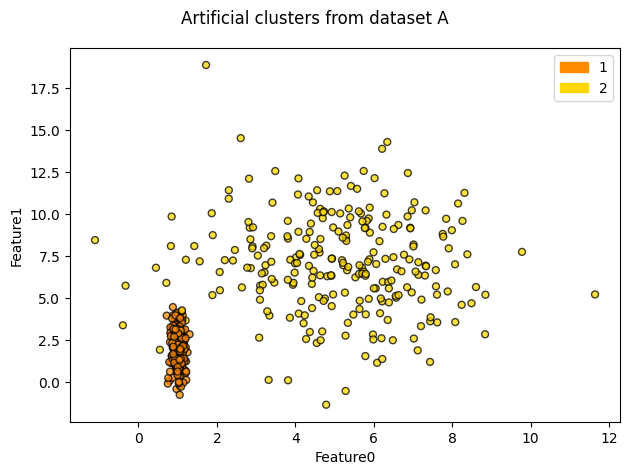

In [14]:
draw_plot(
    dataset_a,
    hue=labels_a,
    alpha=0.75,
    no_zero=True,  # increases cluster labels by 1
    labels=["Feature0", "Feature1"],
    title="Artificial clusters from dataset A",
)

Cluster 2 is much more spread out, because it was generated with a higher standard deviation. Cluster 1 is more dispersed along feature 1, because here the standard deviation is higher.

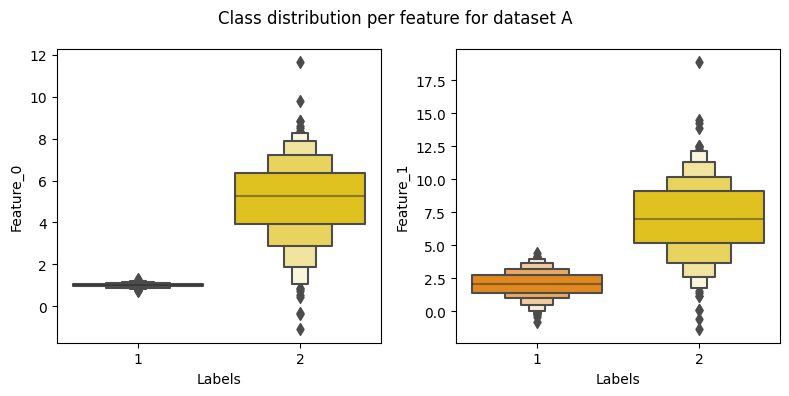

In [15]:
draw_plot(
    dataset_a,
    hue=labels_a,
    plot_type="boxplot",
    figsize=(8, 4),
    grid_size=(1, 2),
    no_zero=True,  # increases cluster labels by 1
    labels=["Feature", "Feature"],
    title="Class distribution per feature for dataset A",
)

The boxplot for dataset A shows, how much the features for clusters 1 and 2 overlap.

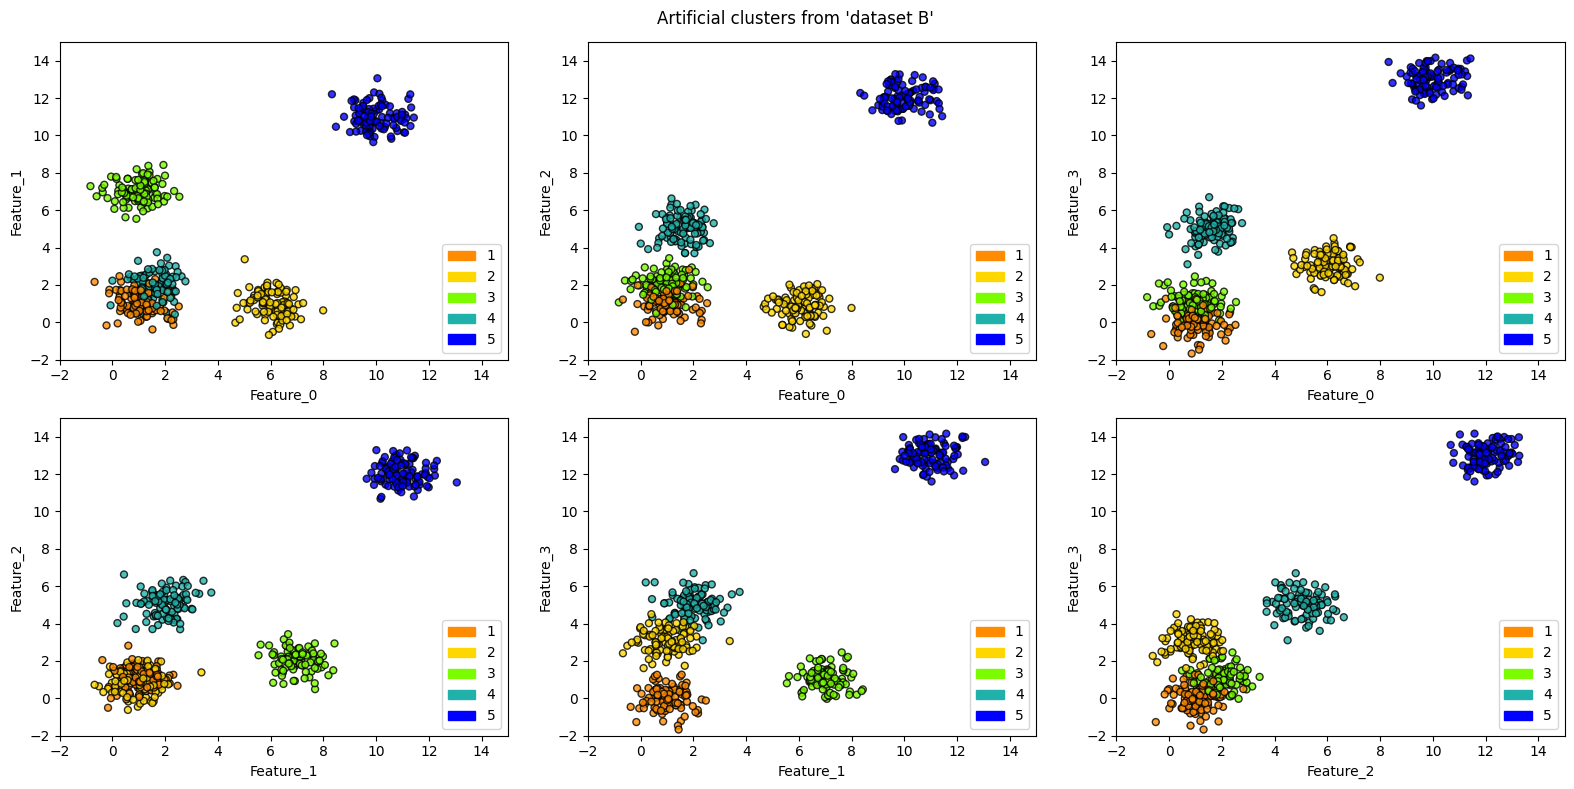

In [16]:
draw_plot(
    dataset_b,
    plot_type="grid",
    hue=labels_b,
    alpha=0.80,
    figsize=(16, 8),
    grid_size=(2, 3),
    no_zero=True,  # increases cluster labels by 1
    labels=["Feature", "Feature"],
    legend_loc="lower right",
    shareaxes=True,
    title="Artificial clusters from 'dataset B'",
)

Displaying each feature combination for dataset B shows how the clusters are structured. Cluster 5 can be clearly distinguished. Clusters 1 to 4 all have overlap in a feature combination with at least one clusters. But they all also have one feature combination that clearly distinguishes them from the other clusters.

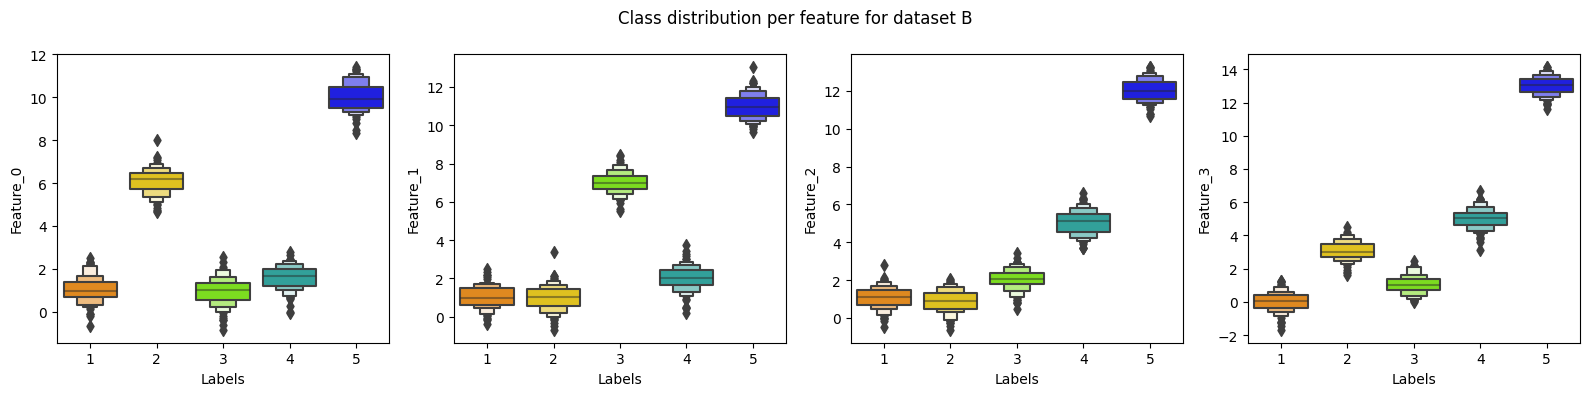

In [17]:
draw_plot(
    dataset_b,
    hue=labels_b,
    plot_type="boxplot",
    figsize=(16, 4),
    grid_size=(1, 4),
    no_zero=True,  # increases cluster labels by 1
    labels=["Feature", "Feature"],
    title="Class distribution per feature for dataset B",
)

The boxplots for dataset B further explain the overlap of the clusters. Again, Cluster 5's features are all distinguishable from the other clusters. Clusters 2, 3 and 4 have a lot of overlap with other clusters, but they have at least one feature which distinguishes them from the other clusters. Cluster 1 mostly has overlap with other clusters, but its feature 3 has the least.

### 2.3. Compute k-Means clusterings of the dataset for different choices of $k$ : 2, 3, . . . , 10. For each $k$ compute the silhouette coefficient and plot them against $k$ in a diagram. Describe and interpret the diagram.

In [18]:
k_range = range(2, 11)

Max score: 0.6173666759368289


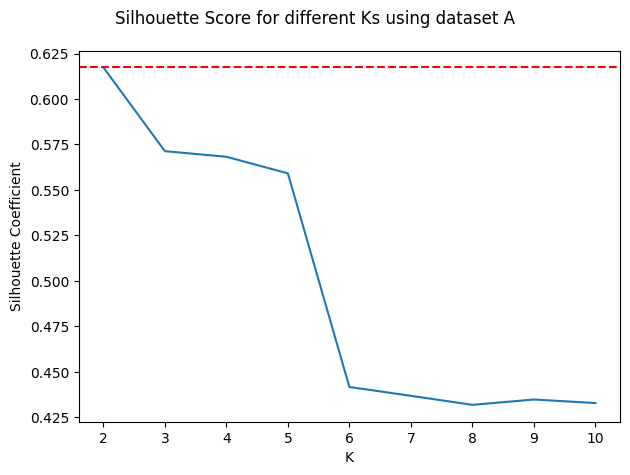

In [19]:
draw_plot(
    dataset_a,
    plot_type="ksscore",
    ks=k_range,
    random_state=random_state,
    labels=["K", "Silhouette Coefficient"],
    title="Silhouette Score for different Ks using dataset A",
)

The graph above shows the Silhouette score for different cluster sizes using dataset A. The best score (0.617) was achieved for a cluster size of two. The cluster sizes 3, 4 and 5 have lower but very similar scores. After a cluster size of 6 the score decreases much more.<br>
This suggest that the best number of clusters for this dataset is two; which we know is true for this artificial dataset. Interestingly, the score is very low, hinting that the clusters are not well separated.

Max score: 0.7710708043703329


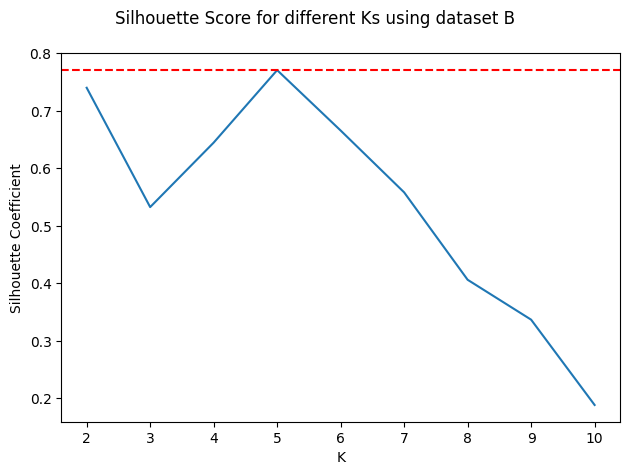

In [20]:
draw_plot(
    dataset_b,
    plot_type="ksscore",
    ks=k_range,
    random_state=random_state,
    labels=["K", "Silhouette Coefficient"],
    title="Silhouette Score for different Ks using dataset B",
)

For dataset B the best score (0.771) is achieved for a cluster size of five. $K=2$ is the second best option with a slightly smaller score. We know that $k=5$ is the correct answer, because this is the number of centers the dataset was generated with. Comparing dataset B's score of 0.771 against dataset A's score of 0.617 suggests, that dataset B's clusters are more compact and have more cohesion, while the clusters of dataset A might have many points with more similarity to samples of the other clusters.
<br>
Dataset B's relatively high score for $k=2$ is interesting, because it reflects the discoveries from exercise 2.2. There it was observable that only cluster 5 had fully distinguishable features. Using $k=2$ would probably result in cluster 5 as one cluster and the other four grouped together to the other cluster.

### 2.4. Choose $k$ according to your result in 2.3 and create the silhouette plot for the clustering. Describe and interpret the diagram.

Cluster:1 with 213 entries. Score: 0.460000
Cluster:2 with 287 entries. Score: 0.740000


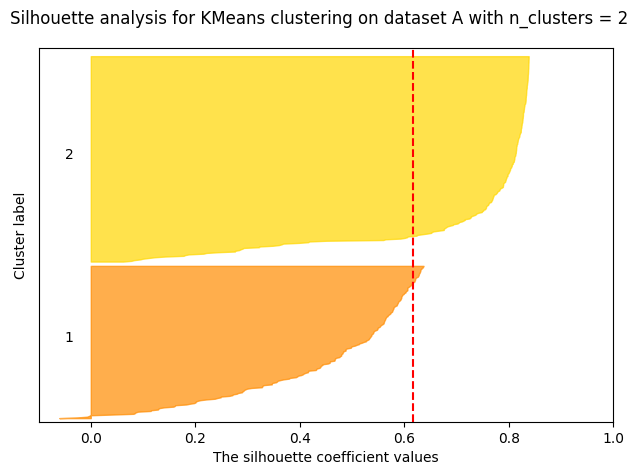

In [21]:
draw_plot(
    dataset_a,
    plot_type="silhouette",
    ks=2,
    random_state=random_state,
    no_zero=True,  # increases cluster labels by 1
    labels=["The silhouette coefficient values", "Cluster label"],
    title="Silhouette analysis for KMeans clustering on dataset A with n_clusters = 2",
)

Using $k=2$, the silhouette plot for dataset A shows why its silhouette score is worse. Although the predicted cluster 2 shows an overall good structure, it has some points with low scores. The predicted cluster 1 has many points with bad cohesion. Some even have negative scores, suggesting that these points have been assigned to the wrong cluster.<br>
Additionally, the cluster sizes have changed. More samples are assigned to cluster 2 than were originally assigned when the artificial clusters were created.

Cluster:1 with 100 entries. Score: 0.730000
Cluster:2 with 100 entries. Score: 0.900000
Cluster:3 with 100 entries. Score: 0.760000
Cluster:4 with 100 entries. Score: 0.740000
Cluster:5 with 100 entries. Score: 0.730000


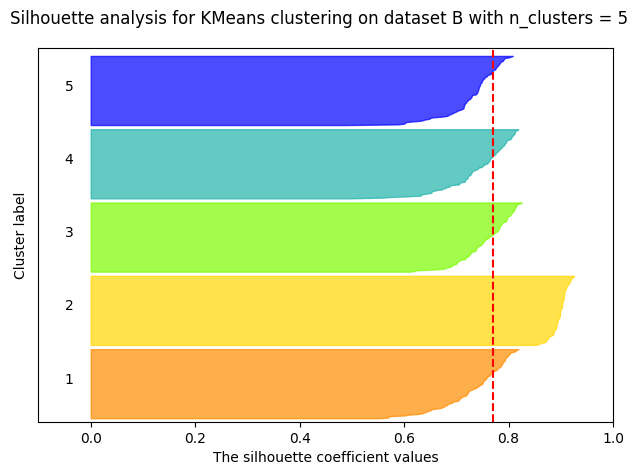

In [22]:
draw_plot(
    dataset_b,
    plot_type="silhouette",
    ks=5,
    random_state=random_state,
    no_zero=True,  # increases cluster labels by 1
    labels=["The silhouette coefficient values", "Cluster label"],
    title="Silhouette analysis for KMeans clustering on dataset B with n_clusters = 5",
)

Using $k=5$, the predictions for dataset B have overall better results. The silhouette plots for all clusters have a good structure. Especially the predicted cluster 2, with its average silhouette score of 0.9, has a very good structure. This is probably the cluster which originally was labeled as cluster 5. All clusters were assigned 100 samples, the same number as the originally created ones.

### 2.5. For the same $k$ plot the data in (one or more) scatter plots. Visualize the clustering using colors. Additionally visualize the cluster centers.

In [23]:
kkm_2 = KMeans(n_clusters=2, random_state=random_state, init="k-means++", max_iter=300, tol=0.0001)
predicted_labels_a = kkm_2.fit_predict(dataset_a)
predicted_centers_a = kkm_2.cluster_centers_

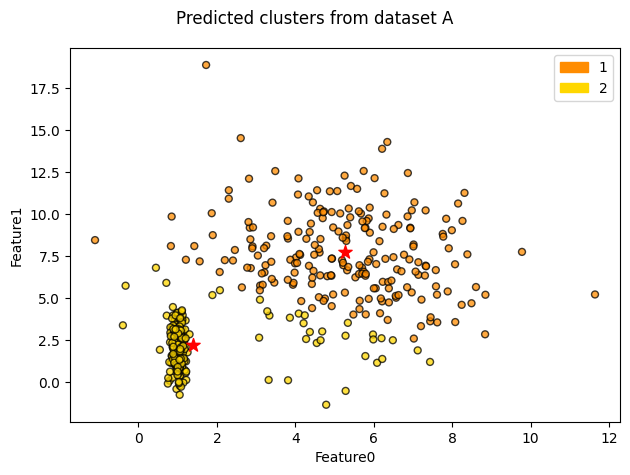

In [24]:
draw_plot(
    dataset_a,
    hue=predicted_labels_a,
    centers=predicted_centers_a,
    alpha=0.75,
    no_zero=True,  # increases cluster labels by 1
    labels=["Feature0", "Feature1"],
    title="Predicted clusters from dataset A",
)

Displaying the predictions for dataset A in a scatter plot shows, that the predicted cluster labels have been flipped from the original assignments. The predicted cluster 2 showed in the previous silhouette plot, that it had many points with high cohesion, but also some with bad. The points with the high cohesion are the originally assigned points, that had a lower standard deviation and are denser. Because the other original cluster has such a high standard deviation, its points are more spread out and therefore some have been assigned to the predicted cluster 2. Those are the points with low silhouette scores.<br>
The points from the predicted cluster 1 are more separated, explaining the overall lower silhouette scores. The negative silhouette scores are very likely the outliers on the left, top and right.

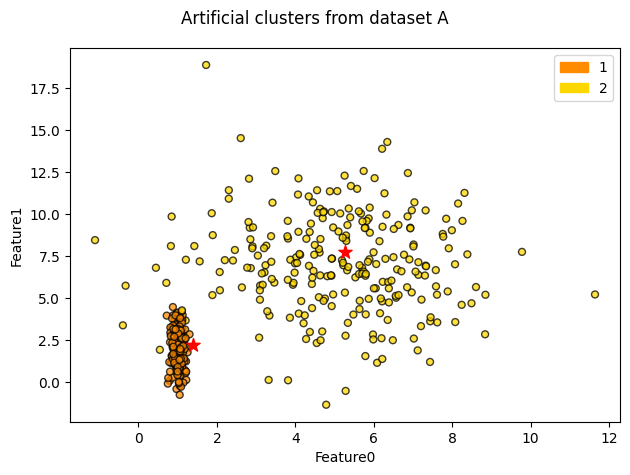

In [25]:
draw_plot(
    dataset_a,
    hue=labels_a,
    alpha=0.75,
    centers=predicted_centers_a,
    no_zero=True,  # increases cluster labels by 1
    labels=["Feature0", "Feature1"],
    title="Artificial clusters from dataset A",
)

Comparing the predicted cluster centers with the originally assigned ones shows, that the center for predicted cluster 2 has moved more to the right. The center for the predicted cluster 1 has moved slightly to the right and up.

In [26]:
kkm_5 = KMeans(n_clusters=5, random_state=random_state, init="k-means++", max_iter=300, tol=0.0001)
predicted_labels_b = kkm_5.fit_predict(dataset_b)
predicted_centers_b = kkm_5.cluster_centers_

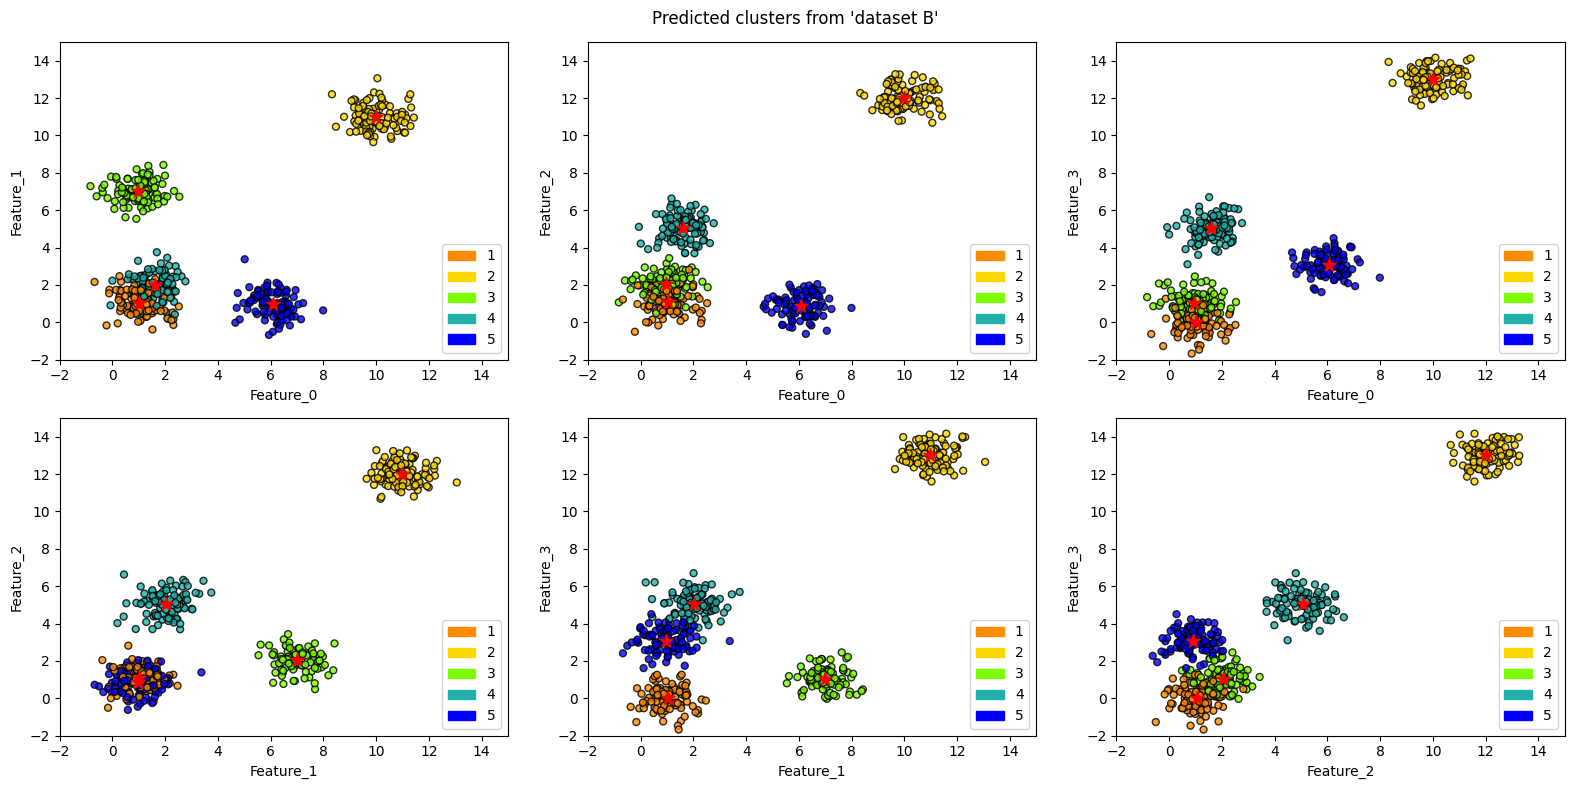

In [27]:
draw_plot(
    dataset_b,
    plot_type="grid",
    hue=predicted_labels_b,
    centers=predicted_centers_b,
    alpha=0.80,
    figsize=(16, 8),
    grid_size=(2, 3),
    no_zero=True,  # increases cluster labels by 1
    labels=["Feature", "Feature"],
    legend_loc="lower right",
    shareaxes=True,
    title="Predicted clusters from 'dataset B'",
)

As suspected in exercise 2.4. the predicted cluster 2 is the top right one, which originally was cluster 5. Comparing the stand out feature combinations of the other clusters shows that these have all been correctly clustered, even if the labels are swapped.

### 2.6.  Compare the properties used to create the datasets and the generated groups with results of $k$-means. Among others, address: differences between the number of blobs and clusters, differences between blob centers and cluster centers, group (blob vs. cluster) assignments – here a short textual overall description is sufficient, no instance-wise comparison is necessary –, the dataset’s suitability for $k$-means, possible obstacles, . . . ).

The artificially created blobs and predicted clusters have the same number of clusters for both datasets.

In [28]:
centers_b , np.round_(predicted_centers_b, 2)

(array([[ 1. ,  1. ,  1. ,  0. ],
        [ 6. ,  1. ,  1. ,  3. ],
        [ 1. ,  7. ,  2. ,  1. ],
        [ 1.5,  2. ,  5. ,  5. ],
        [10. , 11. , 12. , 13. ]]),
 array([[ 1.03,  1.03,  1.07,  0.  ],
        [10.  , 10.98, 12.02, 13.01],
        [ 0.96,  7.  ,  2.03,  1.04],
        [ 1.6 ,  2.02,  5.07,  5.03],
        [ 6.08,  0.96,  0.9 ,  3.09]]))

Dataset B's cluster centers are very similar. The predicted centers are almost identical to the artificially created ones with the same sample distribution.

In [29]:
centers_a, predicted_centers_a

(array([[1, 2],
        [5, 7]]),
 array([[5.27103767, 7.75886794],
        [1.37839712, 2.16078309]]))

The predicted cluster centers of dataset A have changed compared to the artificially created blobs. The denser cluster's center has increases by ~30% for feature 1.<br>
Cluster assignments for dataset A have changed. The predicted clusters have a distribution of 287/213.<br>
Comparing the two datasets has shown the limitations of K-Means. Although dataset B at first appeared to have harder to distinguishable clusters, their low standard deviation paired with four features allows K-Means to successfully identify the correct cluster centers and assign the right samples. Dataset A on the other hand is not suitable for K-Means. The cluster with the much higher standard deviation is more spread out, resulting in a lot of overlap with the other cluster. This with only two features means that K-Means can not draw a clear separation between the two. Many samples from the spread out cluster are assigned to the denser one. <br>
Dataset B's higher dimensionality means that, although the 2D visualizations show no possibility of separation, it K-Means has found a way to separate them in the 4D space. A better approach to cluster dataset A would be the use of a density-based clustering method such as DBSCAN or OPTICS.

---
<a id='ex3'></a>

## 3. Exercise

### 3.1. Verify that the following five vectors form a base of the vector space $\mathbb{R}^5$.

$$
a = \left(\begin{aligned}
        1 \\ 4 \\ 7 \\ 6 \\ 9 \\
    \end{aligned}\right),
b = \left(\begin{aligned}
        7 \\ 8 \\ 9 \\ 2 \\ 1 \\
    \end{aligned}\right),
c = \left(\begin{aligned}
        1 \\ 5 \\ 8 \\ 9 \\ 0 \\
    \end{aligned}\right),
d = \left(\begin{aligned}
        9 \\ 9 \\ 5 \\ 3 \\ 6 \\
    \end{aligned}\right),
e = \left(\begin{aligned}
        0 \\ 0 \\ 2 \\ 3 \\ 1 \\
    \end{aligned}\right)
$$

In [30]:
a = np.array([1, 4, 7, 6, 9])
b = np.array([7, 8, 9, 2, 1])
c = np.array([1, 5, 8, 9, 0])
d = np.array([9, 9, 5, 3, 6])
e = np.array([0, 0, 2, 3, 1])

To verify whether these five vectors from a base of the vector space $\mathbb{R}^5$, we can combine them to a matrix and calculate its rank.

In [31]:
m = np.column_stack((a, b, c, d, e))
m

array([[1, 7, 1, 9, 0],
       [4, 8, 5, 9, 0],
       [7, 9, 8, 5, 2],
       [6, 2, 9, 3, 3],
       [9, 1, 0, 6, 1]])

In [32]:
np.linalg.matrix_rank(m)

5

Because the matrix $m$ has max rank, the five vectors are linear independent and therefore form a base of the vector space $\mathbb{R}^5$.

### 3.2. Describe the vector $f$ as a linear combination of the above five vectors.
$$
f = \left(\begin{aligned}
        1 \\ 0 \\ 0 \\ 0 \\ 0
    \end{aligned}\right)
$$

In [33]:
def lincomb_vec(vector, matrix):
    inv_matrix = np.linalg.inv(matrix)
    return np.matmul(inv_matrix, vector)

In order to calculate $a, b, c, d$ and $e$ we can solve for <br>
$$\vec{x} = \left(\begin{aligned} a\\ b \\ c\\ d \\ e\\ \end{aligned}\right)$$ <br>

using the following equation:

$$
\begin{equation}
\begin{aligned}
    m * \vec{x} &= \vec{f} \\
    m^{-1} * m * \vec{x} &= m^{-1} * \vec{f} \\
    with: &\,\, m * m^{-1} = I \\
    \vec{x} &= m^{-1} * \vec{f}
\end{aligned}
\end{equation}
$$

With $I$ being the identity matrix.

In [34]:
f = np.array([1, 0, 0, 0, 0])
x = lincomb_vec(f, m)
x

array([-0.14163172,  0.05775829, -0.15821578,  0.09950438,  0.61990088])

Vector $f$ can be described as follows:

$$
\left(\begin{aligned}
        1 \\ 0 \\ 0 \\ 0 \\ 0 \\
    \end{aligned}\right) = 
(-)0.14163172 * \left(\begin{aligned}
        1 \\ 4 \\ 7 \\ 6 \\ 9 \\
    \end{aligned}\right) +
0.05775829 * \left(\begin{aligned}
        7 \\ 8 \\ 9 \\ 2 \\ 1 \\
    \end{aligned}\right) +
(-)0.15821578 * \left(\begin{aligned}
        1 \\ 5 \\ 8 \\ 9 \\ 0 \\
    \end{aligned}\right) +
0.09950438 * \left(\begin{aligned}
        9 \\ 9 \\ 5 \\ 3 \\ 6 \\
    \end{aligned}\right) +
0.61990088 * \left(\begin{aligned}
        0 \\ 0 \\ 2 \\ 3 \\ 1 \\
    \end{aligned}\right)
$$

In [35]:
x[0] * a + x[1] * b + x[2] * c + x[3] * d + x[4] * e

array([1.00000000e+00, 2.22044605e-16, 0.00000000e+00, 4.44089210e-16,
       3.33066907e-16])

The result is correct. The small deviations are a result of Pythons limitations with floating point numbers.

---
<a id='ex4'></a>

## 4. Exercise

### 4.1. Verify that the set containing the following five vectors is not linear independent.
$$
a = \left(\begin{aligned}
        8 \\ 4 \\ 2 \\ 1 \\ 9 \\
    \end{aligned}\right),
b = \left(\begin{aligned}
        15 \\ 19 \\ 1 \\ 9 \\ 21 \\
    \end{aligned}\right),
c = \left(\begin{aligned}
        1 \\ 4 \\ 8 \\ 5 \\ 0 \\
    \end{aligned}\right),
d = \left(\begin{aligned}
        9 \\ 9 \\ 5 \\ 3 \\ 6 \\
    \end{aligned}\right),
e = \left(\begin{aligned}
        4 \\ 2 \\ 8 \\ 2 \\ 1 \\
    \end{aligned}\right)
$$

In [36]:
a_4 = np.array([8, 4, 2, 1, 9])
b_4 = np.array([15, 19, 1, 9, 21])
c_4 = np.array([1, 4, 8, 5, 0])
d_4 = np.array([9, 9, 5, 3, 6])
e_4 = np.array([4, 2, 8, 2, 1])

In [37]:
m_4 = np.column_stack((a_4, b_4, c_4, d_4, e_4))
m_4

array([[ 8, 15,  1,  9,  4],
       [ 4, 19,  4,  9,  2],
       [ 2,  1,  8,  5,  8],
       [ 1,  9,  5,  3,  2],
       [ 9, 21,  0,  6,  1]])

In [38]:
np.linalg.matrix_rank(m_4)

4

The five vectors do not have max rank and are therefore not linear independent.

### 4.2.  The vectors $a$, $b$, $c$ and $d$ form the base of a vector subspace of $\mathbb{R}^5$. Verify that $f$ is not a member of that subspace.

$$
f = \left(\begin{aligned}
        1 \\ 0 \\ 0 \\ 0 \\ 0
    \end{aligned}\right)
$$

Here we can again calculate the rank of the matrix made up of $a, b, c, d$ and $f$. If it has full rank, $f$ can not be represented by any of the other vectors and therefore making independent of them.

In [39]:
m_42 = np.column_stack((a_4, b_4, c_4, d_4, f))
m_42

array([[ 8, 15,  1,  9,  1],
       [ 4, 19,  4,  9,  0],
       [ 2,  1,  8,  5,  0],
       [ 1,  9,  5,  3,  0],
       [ 9, 21,  0,  6,  0]])

In [40]:
np.linalg.matrix_rank(m_42)

5

Because the matrix containing $a, b,c,d$ and $f$ has full rank, $f$ is not a member of the subspace created by $a,b,c$ and $d$.

### 4.3. Use the sympy library to compute a linear combination of $a$, $b$, $c$ and $d$ for $e$.


First we create the variables for which we want a solution.

In [41]:
a, b, c, d = symbols("a,b,c,d")

Next we create the matrix which has to solved.

In [42]:
sym_m = Matrix([a_4, b_4, c_4, d_4, e_4]).T
sym_m

Matrix([
[8, 15, 1, 9, 4],
[4, 19, 4, 9, 2],
[2,  1, 8, 5, 8],
[1,  9, 5, 3, 2],
[9, 21, 0, 6, 1]])

In [43]:
res = linsolve(sym_m, (a, b, c, d))
res

{(2/3, -1/3, 2/3, 1/3)}

In [44]:
a, b, c, d = list(res)[0]

Lastly we verify the results.

In [45]:
(a * Matrix([a_4]) + b * Matrix([b_4]) + c * Matrix([c_4]) + d * Matrix([d_4])).T

Matrix([
[4],
[2],
[8],
[2],
[1]])

---
<a id='ref'></a>

## References

<p> [1] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
<p> [2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html
<p> [3] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html
<p> [4] https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html